In [2]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt 
import seaborn as sns

# 1. Problem Statement

In [ ]:
predict that the team won man of the match trophy or not

# 2. Data Gathering

In [3]:
df=pd.read_csv(r"C:\Users\CHETAK\Desktop\daily class notes\archive (4)\FIFA 2018 Statistics.csv")
df

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,...,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,...,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,...,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,...,2,0,0,Yes,18.0,Final,No,0,1.0,18.0


# 3. EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    128 non-null    object 
 1   Team                    128 non-null    object 
 2   Opponent                128 non-null    object 
 3   Goal Scored             128 non-null    int64  
 4   Ball Possession %       128 non-null    int64  
 5   Attempts                128 non-null    int64  
 6   On-Target               128 non-null    int64  
 7   Off-Target              128 non-null    int64  
 8   Blocked                 128 non-null    int64  
 9   Corners                 128 non-null    int64  
 10  Offsides                128 non-null    int64  
 11  Free Kicks              128 non-null    int64  
 12  Saves                   128 non-null    int64  
 13  Pass Accuracy %         128 non-null    int64  
 14  Passes                  128 non-null    in

In [4]:
df.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,...,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,...,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,...,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,...,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,...,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,...,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


In [6]:
df.isna().sum()

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

In [4]:
# we have to convert all data in numeric first then fill null values

# 4. Feature Engg

### 4.1 Date

In [9]:
df['Date']

0      14-06-2018
1      14-06-2018
2      15-06-2018
3      15-06-2018
4      15-06-2018
          ...    
123    11-07-2018
124    14-07-2018
125    14-07-2018
126    15-07-2018
127    15-07-2018
Name: Date, Length: 128, dtype: object

### 4.2 Team

In [10]:
df['Team']

0            Russia
1      Saudi Arabia
2             Egypt
3           Uruguay
4           Morocco
           ...     
123         England
124         Belgium
125         England
126          France
127         Croatia
Name: Team, Length: 128, dtype: object

### 4.3 Opponent

In [12]:
df['Opponent']

0      Saudi Arabia
1            Russia
2           Uruguay
3             Egypt
4              Iran
           ...     
123         Croatia
124         England
125         Belgium
126         Croatia
127          France
Name: Opponent, Length: 128, dtype: object

### 4.4 Round

In [13]:
df['Round']

0       Group Stage
1       Group Stage
2       Group Stage
3       Group Stage
4       Group Stage
           ...     
123    Semi- Finals
124       3rd Place
125       3rd Place
126           Final
127           Final
Name: Round, Length: 128, dtype: object

In [14]:
df['Round'].value_counts()

Group Stage       96
Round of 16       16
Quarter Finals     8
Semi- Finals       4
3rd Place          2
Final              2
Name: Round, dtype: int64

In [59]:
df['Round'].value_counts().to_dict()

{'Group Stage': 96,
 'Round of 16': 16,
 'Quarter Finals': 8,
 'Semi- Finals': 4,
 '3rd Place': 2,
 'Final': 2}

In [60]:
df['Round'].replace({'Group Stage': 6,
 'Round of 16': 4,
 'Quarter Finals': 2,
 'Semi- Finals': 1,
 '3rd Place': 0,
 'Final': 0},inplace=True)

### 4.5 PSO

In [16]:
df['PSO'].value_counts()

No     120
Yes      8
Name: PSO, dtype: int64

In [61]:
df['PSO'].value_counts().to_dict()

{'No': 120, 'Yes': 8}

In [62]:
df['PSO'].replace({'No': 1, 'Yes': 0},inplace=True)

### 4.6 Man Of the Match

In [66]:
df['Man of the Match']

0      Yes
1       No
2       No
3      Yes
4       No
      ... 
123     No
124    Yes
125     No
126    Yes
127     No
Name: Man of the Match, Length: 128, dtype: object

In [67]:
df['Man of the Match'].value_counts()

Yes    64
No     64
Name: Man of the Match, dtype: int64

In [68]:
df['Man of the Match'].value_counts().to_dict()

{'Yes': 64, 'No': 64}

In [69]:
df['Man of the Match'].replace({'Yes': 1, 'No': 0},inplace=True)

### 4.7 1st Goal

In [21]:
df['1st Goal']

0      12.0
1       NaN
2       NaN
3      89.0
4       NaN
       ... 
123     5.0
124     4.0
125     NaN
126    18.0
127    28.0
Name: 1st Goal, Length: 128, dtype: float64

In [23]:
df['1st Goal'].mean()

39.45744680851064

In [25]:
median=df['1st Goal'].median()

In [35]:
df['1st Goal'].fillna(df['1st Goal'].median(),inplace=True)

In [36]:
df['1st Goal']

0      12.0
1      39.0
2      39.0
3      89.0
4      39.0
       ... 
123     5.0
124     4.0
125    39.0
126    18.0
127    28.0
Name: 1st Goal, Length: 128, dtype: float64

### 4.8 Own Goals

In [37]:
df['Own goals']

0      NaN
1      NaN
2      NaN
3      NaN
4      1.0
      ... 
123    NaN
124    NaN
125    NaN
126    1.0
127    NaN
Name: Own goals, Length: 128, dtype: float64

In [38]:
df['Own goals'].value_counts()

1.0    12
Name: Own goals, dtype: int64

In [39]:
df['Own goals'].isna().sum()

116

In [44]:
df['Own goals'].fillna(0,inplace=True)
df['Own goals']

0      0.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
123    0.0
124    0.0
125    0.0
126    1.0
127    0.0
Name: Own goals, Length: 128, dtype: float64

### 4.9 Own Goal Time

In [45]:
df['Own goal Time']

0       NaN
1       NaN
2       NaN
3       NaN
4      90.0
       ... 
123     NaN
124     NaN
125     NaN
126    18.0
127     NaN
Name: Own goal Time, Length: 128, dtype: float64

In [53]:
df['Own goal Time'].value_counts()

90.0    2
81.0    1
32.0    1
37.0    1
47.0    1
23.0    1
74.0    1
33.0    1
12.0    1
13.0    1
18.0    1
Name: Own goal Time, dtype: int64

In [51]:
df['Own goal Time'].isna().sum()

116

In [54]:
df['Own goal Time'].mean()

45.833333333333336

In [55]:
df['Own goal Time'].median()

35.0

In [56]:
df['Own goal Time'].fillna(40,inplace=True)

In [57]:
df['Own goal Time']

0      40.0
1      40.0
2      40.0
3      40.0
4      90.0
       ... 
123    40.0
124    40.0
125    40.0
126    18.0
127    40.0
Name: Own goal Time, Length: 128, dtype: float64

In [70]:
df.isna().sum()

Goal Scored               0
Ball Possession %         0
Attempts                  0
On-Target                 0
Off-Target                0
Blocked                   0
Corners                   0
Offsides                  0
Free Kicks                0
Saves                     0
Pass Accuracy %           0
Passes                    0
Distance Covered (Kms)    0
Fouls Committed           0
Yellow Card               0
Yellow & Red              0
Red                       0
Man of the Match          0
1st Goal                  0
Round                     0
PSO                       0
Goals in PSO              0
Own goals                 0
Own goal Time             0
dtype: int64

In [71]:
# we handle all null values succesfully

# 5. Feature Selection

In [ ]:
# we can drop date team opponent columns beacuse if drop them this will not affect on our model

In [ ]:
df.drop(['Date','Team','Opponent'],axis=1,inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Goal Scored             128 non-null    int64  
 1   Ball Possession %       128 non-null    int64  
 2   Attempts                128 non-null    int64  
 3   On-Target               128 non-null    int64  
 4   Off-Target              128 non-null    int64  
 5   Blocked                 128 non-null    int64  
 6   Corners                 128 non-null    int64  
 7   Offsides                128 non-null    int64  
 8   Free Kicks              128 non-null    int64  
 9   Saves                   128 non-null    int64  
 10  Pass Accuracy %         128 non-null    int64  
 11  Passes                  128 non-null    int64  
 12  Distance Covered (Kms)  128 non-null    int64  
 13  Fouls Committed         128 non-null    int64  
 14  Yellow Card             128 non-null    in

In [73]:
# now all data is numeric and non null now we can train our model

# 6. Model Tranning

In [74]:
y=df['Man of the Match']
x=df.drop('Man of the Match',axis=1)

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12,stratify=y)

In [138]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

### Test Data Evalution

In [139]:
####### Testing Data Model Evaluation 

y_pred = dt_model.predict(x_test)
# y_pred

acc_score = accuracy_score(y_test,y_pred)
print(f"Acc = {acc_score}")

cnf_matrix = confusion_matrix(y_test,y_pred)
print(f"Confusion matrix \n {cnf_matrix}")

clf = classification_report(y_test,y_pred)
print(f"Classification Report \n {clf}")

Acc = 0.625
Confusion matrix 
 [[11  5]
 [ 7  9]]
Classification Report 
               precision    recall  f1-score   support

           0       0.61      0.69      0.65        16
           1       0.64      0.56      0.60        16

    accuracy                           0.62        32
   macro avg       0.63      0.62      0.62        32
weighted avg       0.63      0.62      0.62        32



### Trainning Data Evalution

In [140]:
####### Training  Data Model Evaluation 

y_pred_train = dt_model.predict(x_train)
y_pred_train

acc_score = accuracy_score(y_train,y_pred_train)
print(f"Acc = {acc_score}")

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print(f"Confusion matrix \n {cnf_matrix}")

clf = classification_report(y_train,y_pred_train)
print(f"Classification Report \n {clf}")

Acc = 1.0
Confusion matrix 
 [[48  0]
 [ 0 48]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        48

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



In [ ]:
as variance is high  we face overfit problem to overcome that we have use hyperparameter tunning

### Hyperparameter Tunning

In [141]:
dt_model = DecisionTreeClassifier()

hyp = {"criterion":['gini','entropy'],
       'max_depth':np.arange(10,20),
      'min_samples_split': np.arange(15,30),
      'min_samples_leaf':np.arange(3,10)}

rscv = RandomizedSearchCV(dt_model,hyp, cv= 5)

rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [142]:
rscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=7,
                       min_samples_split=21)

In [143]:
dt_model = rscv.best_estimator_
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=7,
                       min_samples_split=21)

#### Evalution after hyperparameter tunning

In [144]:
#### Testing Data Evaluation 

y_pred = dt_model.predict(x_test)
# y_pred

acc_score = accuracy_score(y_test,y_pred)
print(f"Acc = {acc_score}")

cnf_matrix = confusion_matrix(y_test,y_pred)
print(f"Confusion matrix \n {cnf_matrix}")

clf = classification_report(y_test,y_pred)
print(f"Classification Report \n {clf}")

Acc = 0.71875
Confusion matrix 
 [[11  5]
 [ 4 12]]
Classification Report 
               precision    recall  f1-score   support

           0       0.73      0.69      0.71        16
           1       0.71      0.75      0.73        16

    accuracy                           0.72        32
   macro avg       0.72      0.72      0.72        32
weighted avg       0.72      0.72      0.72        32



In [145]:
####### Training  Data Model Evaluation 

y_pred_train = dt_model.predict(x_train)
y_pred_train

acc_score = accuracy_score(y_train,y_pred_train)
print(f"Acc = {acc_score}")

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print(f"Confusion matrix \n {cnf_matrix}")

clf = classification_report(y_train,y_pred_train)
print(f"Classification Report \n {clf}")

Acc = 0.8229166666666666
Confusion matrix 
 [[40  8]
 [ 9 39]]
Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.83      0.82        48
           1       0.83      0.81      0.82        48

    accuracy                           0.82        96
   macro avg       0.82      0.82      0.82        96
weighted avg       0.82      0.82      0.82        96



In [146]:
plt.figure(figsize= (200,100))
tree = plot_tree(dt_model,feature_names = x.columns, class_names=['0','1'],filled=True)
plt.savefig('dt.png')

In [147]:
result = dt_model.cost_complexity_pruning_path(x_train,y_train)
result

{'ccp_alphas': array([0.        , 0.03984479, 0.04179829, 0.06113111, 0.07177623,
        0.20305968]),
 'impurities': array([0.48141399, 0.56110357, 0.60290186, 0.72516409, 0.79694032,
        1.        ])}

In [148]:
ccp_alpha_value = result['ccp_alphas']
ccp_alpha_value

array([0.        , 0.03984479, 0.04179829, 0.06113111, 0.07177623,
       0.20305968])

In [150]:
train_data_acc =[]
test_data_acc =[]

for ccp in ccp_alpha_value:
    dt_model= DecisionTreeClassifier(ccp_alpha = ccp)
    dt_model.fit(x_train,y_train)
    
    test_acc = dt_model.score(x_test,y_test)
    train_acc = dt_model.score(x_train,y_train)
    
    train_data_acc.append(train_acc)
    test_data_acc.append(test_acc)

In [151]:
train_data_acc

[1.0, 0.75, 0.75, 0.75, 0.75, 0.5]

In [152]:
test_data_acc

[0.65625, 0.625, 0.625, 0.625, 0.625, 0.5]

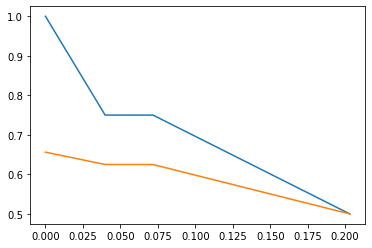

In [153]:
plt.plot(ccp_alpha_value,train_data_acc)
plt.plot(ccp_alpha_value,test_data_acc)

In [155]:
final_dt_model = DecisionTreeClassifier(ccp_alpha = 0.075)
final_dt_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.075)

In [157]:
y_pred = final_dt_model.predict(x_test)
# y_pred

acc_score = accuracy_score(y_test,y_pred)
print(f"Acc = {acc_score}")

cnf_matrix = confusion_matrix(y_test,y_pred)
print(f"Confusion matrix \n {cnf_matrix}")

clf = classification_report(y_test,y_pred)
print(f"Classification Report \n {clf}")

Acc = 0.625
Confusion matrix 
 [[13  3]
 [ 9  7]]
Classification Report 
               precision    recall  f1-score   support

           0       0.59      0.81      0.68        16
           1       0.70      0.44      0.54        16

    accuracy                           0.62        32
   macro avg       0.65      0.62      0.61        32
weighted avg       0.65      0.62      0.61        32



In [158]:
####### Training  Data Model Evaluation 

y_pred_train = final_dt_model.predict(x_train)
y_pred_train

acc_score = accuracy_score(y_train,y_pred_train)
print(f"Acc = {acc_score}")

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print(f"Confusion matrix \n {cnf_matrix}")

clf = classification_report(y_train,y_pred_train)
print(f"Classification Report \n {clf}")

Acc = 0.75
Confusion matrix 
 [[40  8]
 [16 32]]
Classification Report 
               precision    recall  f1-score   support

           0       0.71      0.83      0.77        48
           1       0.80      0.67      0.73        48

    accuracy                           0.75        96
   macro avg       0.76      0.75      0.75        96
weighted avg       0.76      0.75      0.75        96



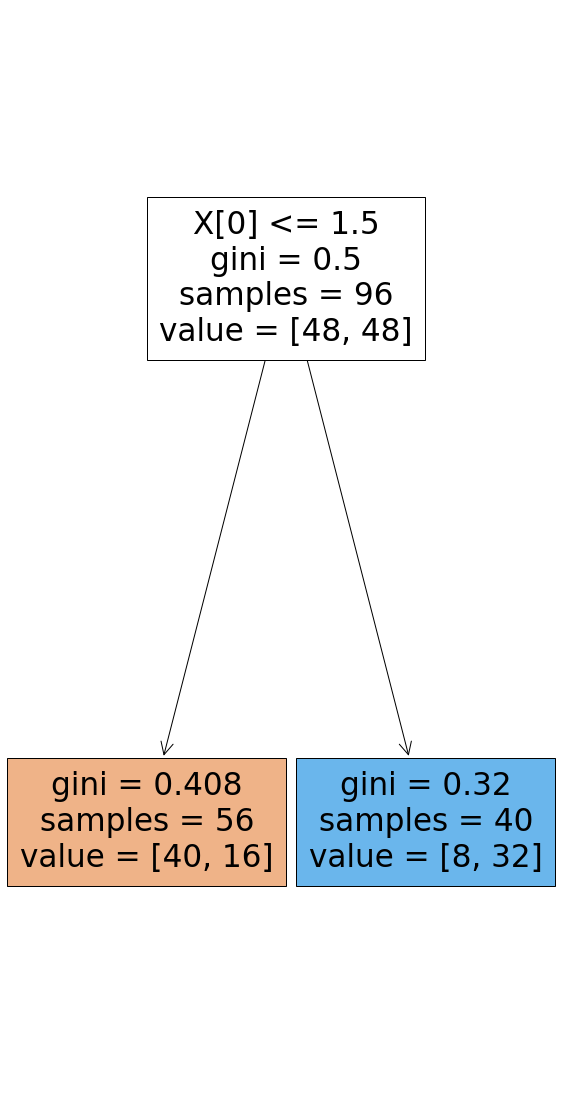

In [161]:
plt.figure(figsize=(10,20))
tree = plot_tree(final_dt_model,filled=True)
plt.savefig('ccp_dt.png')